# Задание 3. Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [82]:
import numpy as np
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

### Задание 1.

Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации  𝛼 , используя полные данные для обучения и для тестирования.

In [83]:
print(X)

[[  9.31  -17.043  20.807  11.109]
 [ -6.446 -12.46  -12.941 -14.715]
 [ 14.324  -9.624  29.533   1.439]
 ...
 [  3.56    2.063   7.302  -7.817]
 [ 11.841 -14.315  23.148  11.777]
 [ -3.345 -15.219  -4.751  -1.141]]


In [84]:
print(np.shape(X))

(1000, 4)


In [85]:
print(np.shape(Y))

(1000,)


In [86]:
def solve(alpha):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(4)) @ X.T @ Y
    Y1 = X @ theta
    MSE = np.sum((Y - Y1) ** 2) / len(Y-Y1)
    return MSE

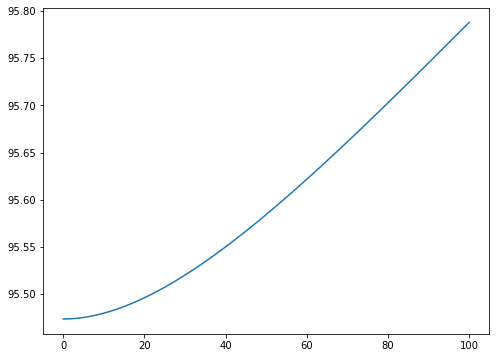

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
Alpha = np.linspace(0, 100, 1000)
Solve = [solve(alpha) for alpha in Alpha]

plt.plot(Alpha, Solve)

### Задание 2.

Подготовьте исходные данные для 5 fold CV.

In [88]:
def fold(X, Y):
    
    train = []
    train_labels = []

    test = []
    test_labels = []

    step = int(len(X) / 5)
    indx = 0

    for i in range(5):
        test.append(X[indx:indx+step])
        test_labels.append(Y[indx:indx+step])
        train.append(np.concatenate([X[0:indx], X[indx+step:]]))
        train_labels.append(np.concatenate([Y[0:indx], Y[indx+step:]]))
        indx += step

    train = np.array(train)
    train_labels = np.array(train_labels)
    test = np.array(test)
    test_labels = np.array(test_labels)
        
    return [train, train_labels, test, test_labels]

In [89]:
train, train_labels, test, test_labels = fold(X,Y)

In [90]:
print(np.shape(train))
print(np.shape(test))
print(np.shape(train_labels))
print(np.shape(test_labels))

(5, 800, 4)
(5, 200, 4)
(5, 800)
(5, 200)


### Задание 3.

С помощью CV найдите оптимальное значение  𝛼  на какой-нибудь сетке значений.

In [91]:
def solve(alpha, X, Y, X_test, Y_test):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(4)) @ X.T @ Y
    Y_pred = X_test @ theta
    MSE = np.sum((Y_test - Y_pred) ** 2) / len(Y_test-Y_pred)
    return MSE

In [92]:
def linearRegression(train, test, train_labels, test_labels):
    valid_vals = []
    train_vals = []
    Alpha = np.linspace(0, 100, 1000)
        
    for alpha in Alpha:
        Solve = [solve(alpha, train[i], train_labels[i], test[i], test_labels[i]) for i in range(5)]
        trainSolve = [solve(alpha, train[i], train_labels[i], train[i], train_labels[i]) for i in range(5)]
        valid_vals.append(np.sum(Solve) / len(Solve))
        train_vals.append(np.sum(trainSolve) / len(trainSolve))
    
    return [np.array(valid_vals), np.array(train_vals)]

In [93]:
res = linearRegression(train, test, train_labels, test_labels)

In [94]:
valid_vals = res[0]

In [95]:
min_MSE = valid_vals[valid_vals.argmin()]
min_alpha = Alpha[valid_vals.argmin()]

print('Min MSE: ', min_MSE)
print('Alpha minimizing MSE: ', min_alpha)

Min MSE:  96.41829738717855
Alpha minimizing MSE:  3.9039039039039043


### Задание 4.

Постройте валидационную кривую.

In [96]:
train_vals = res[1]

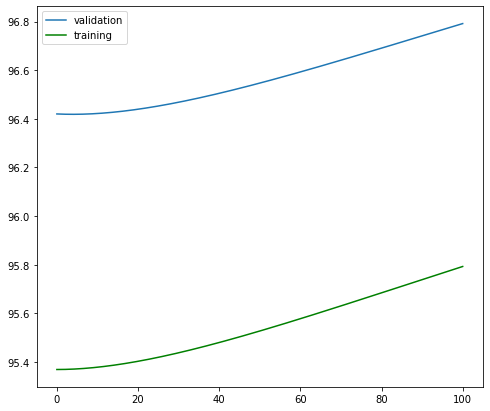

In [97]:
plt.figure(figsize = (8,7))
plt.plot(Alpha, valid_vals, label='validation')
plt.plot(Alpha, train_vals, 'g', label='training')
plt.legend()

### Задание 5.

Постройте кривую обучения.

In [98]:
def learningCurve(X, Y):
    
    alpha = 3.9
    
    test = X[100:]
    test_labels = Y[100:]
    
    train_size = np.arange(50,1050,50)
    train_vals = []   
    valid_vals = []
    
    for size in train_size:
        
        train = X[:size]
        train_labels = Y[:size]
        
        valid_vals.append(solve(alpha, train, train_labels, test, test_labels))
        train_vals.append(solve(alpha, train, train_labels, train, train_labels))
        
    return [np.array(train_vals), np.array(valid_vals)]

In [99]:
res = learningCurve(X, Y)

train_vals = res[0]
valid_vals = res[1]

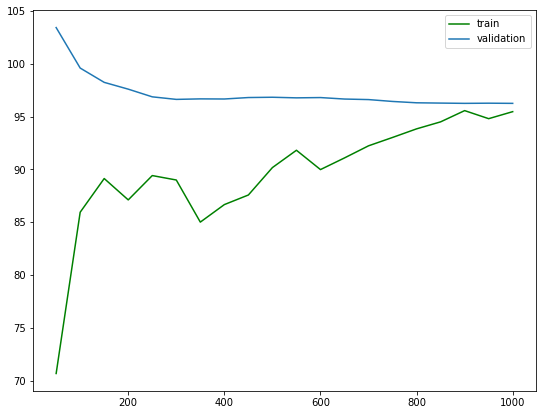

In [100]:
plt.figure(figsize = (9,7))
plt.plot(train_size, train_vals,'g', label='train')
plt.plot(train_size, valid_vals, label='validation')
plt.legend()